In [30]:
# Import required libraries
# Pandas is used for data manipulation
import pandas as pd

# matplotlib is used for plotting graphics
import matplotlib.pyplot as plt

# seaborn is used for plotting graphics
import seaborn

In [31]:
# Load data from CSV file
df = pd.read_csv('dataset.csv')

# Shows the first 5 rows of the dataframe
df.head()

,date,jasmine,milk_tea,choco_milk,brown_sugar,nastar,strawberry_milk,manggo_milk,rose_milk,rose_milk_tea,...,lemon_mango,orange_lychee,orange_mango,mango_lychee,markisa_fruit,markisa_mango_fruit,passion_lychee_fruit,watermelon_mango_fruit,watermelon_lychee_fruit,sales_total
0,09/01/2024,108,5,8,5,0,2,2,0,0,...,0,0,0,0,1,0,0,0,0,956000
1,09/02/2024,96,2,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,602000
2,09/03/2024,75,1,5,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,543000
3,09/04/2024,63,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,480000
4,09/05/2024,77,1,1,2,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,613000


In [32]:
# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")

# Shows the first 5 rows of the dataset
df.head()

,date,jasmine,milk_tea,choco_milk,brown_sugar,nastar,strawberry_milk,manggo_milk,rose_milk,rose_milk_tea,...,lemon_mango,orange_lychee,orange_mango,mango_lychee,markisa_fruit,markisa_mango_fruit,passion_lychee_fruit,watermelon_mango_fruit,watermelon_lychee_fruit,sales_total
0,2024-09-01,108,5,8,5,0,2,2,0,0,...,0,0,0,0,1,0,0,0,0,956000
1,2024-09-02,96,2,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,602000
2,2024-09-03,75,1,5,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,543000
3,2024-09-04,63,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,480000
4,2024-09-05,77,1,1,2,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,613000


## 1. Sales Total in 30 Days Analysis

In [33]:
# Extract month from 'date' column
month = df["date"].dt.month

In [34]:
# Filter data for September and November
sept_df = df[month == 9]
nov_df = df[month == 11]

In [35]:
# Extract day from 'date' column
sept_df['day'] = df['date'].dt.day
nov_df['day'] = df['date'].dt.day

C:\Users\bryan\AppData\Local\Temp\ipykernel_18620\1738027573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sept_df['day'] = df['date'].dt.day
C:\Users\bryan\AppData\Local\Temp\ipykernel_18620\1738027573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_df['day'] = df['date'].dt.day


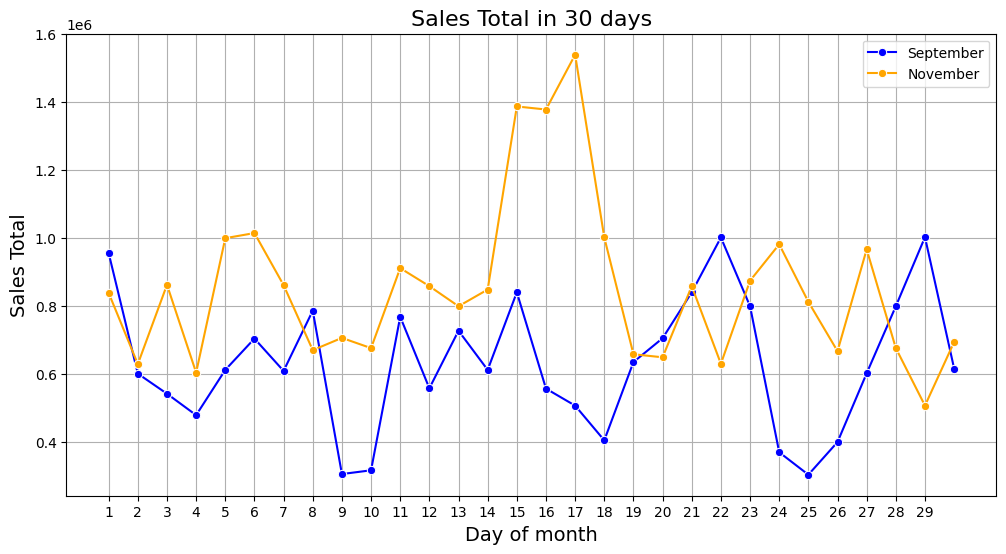

In [36]:
# Create a figure
plt.figure(figsize=(12, 6))

# Plot september datas in blue color
seaborn.lineplot(
    x="day", y="sales_total", data=sept_df, label="September", marker="o", color="blue"
)

# Plot november datas in orange color
seaborn.lineplot(
    x="day", y="sales_total", data=nov_df, label="November", marker="o", color="orange"
)

# Set the title of the plot
plt.title("Sales Total in 30 days", fontsize=16)

# Set the label of the x-axis
plt.xlabel("Day of month", fontsize=14)

# Set the label of the y-axis
plt.ylabel("Sales Total", fontsize=14)

# Set the x-axis range from 1 to 30
plt.xticks(range(1, 30))

# Show the legend
plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

Penjualan pada tanggal 2, 4, 10, 12, 14, 16, dan 25 mengalami penurunan

## 2. Product Peformance Analysis

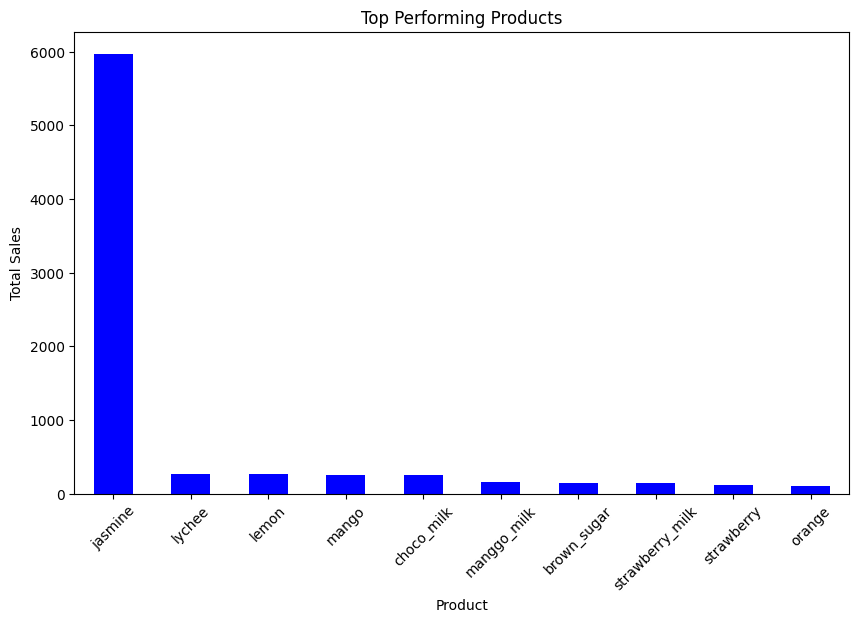

In [37]:
# Extract the product sales data
product_sales = df.drop(columns=["date"]).drop(columns=["sales_total"])

# Calculate the total sales for each product
total_product_sales = product_sales.sum().sort_values(ascending=False)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the top products using a bar chart
total_product_sales.head(10).plot(kind="bar", color="blue")

# Set the title of the plot
plt.title("Top Performing Products")

# Set the label of the x-axis
plt.xlabel("Product")

# Set the label of the y-axis
plt.ylabel("Total Sales")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

### 3. Sales Peformance Each Product

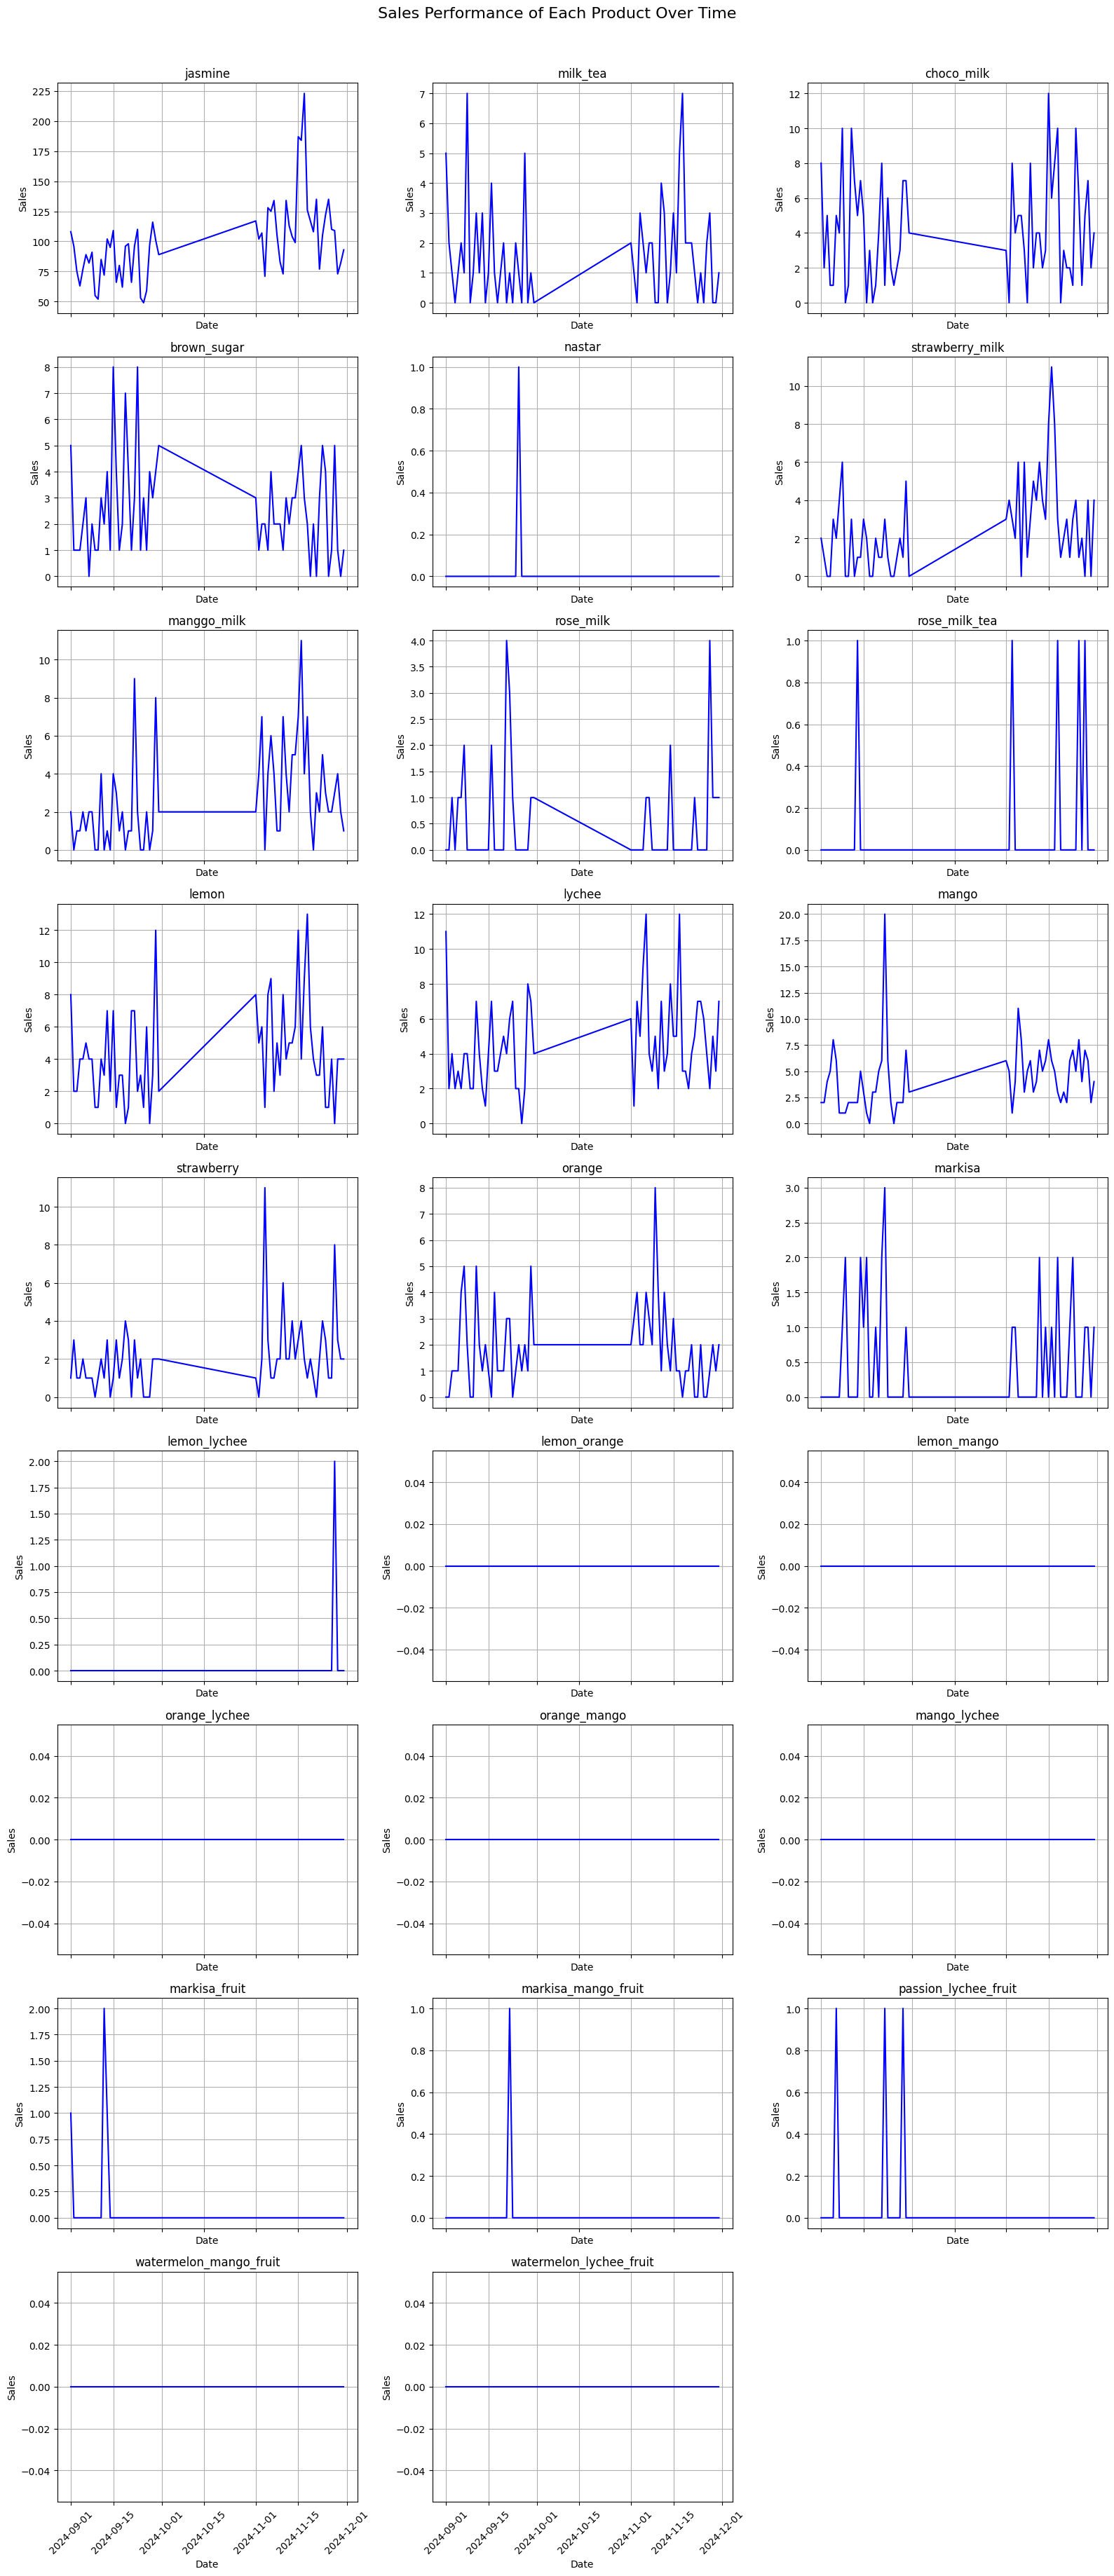

In [49]:
# Exclude 'date' and 'sales_total' column
product_columns = df.columns[1:-1]

# Number of products
num_products = len(product_columns)

# Set up subplots (arrange them in a grid)
# Arrange row for 3 columns
rows = (num_products + 2) // 3

# Create a figure with subplots
fig, axes = plt.subplots(rows, 3, figsize=(16, 4 * rows), sharex=True)

# Flatten axes for easy indexing (handles cases where we have fewer products than subplot slots)
axes = axes.flatten()

# Plot each product on a separate subplot
for i, product in enumerate(product_columns):
    # Plot the product sales data
    axes[i].plot(df["date"], df[product], label=product, color="blue")

    # Set the title of the subplot
    axes[i].set_title(product, fontsize=12)

    # Set the label of the x-axis
    axes[i].set_xlabel("Date", fontsize=10)

    # Set the label of the y-axis
    axes[i].set_ylabel("Sales", fontsize=10)
    
    # Display the grid
    axes[i].grid(True)

    # Rotate the x-axis labels
    axes[i].tick_params(axis="x", rotation=45)

# Hide unused subplots (if any)
for i in range(i + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Set the title of the plot
plt.suptitle("Sales Performance of Each Product Over Time", fontsize=16, y=1.02)

# Show the plot
plt.show()

### 4. Show Correlation Matrix between Products

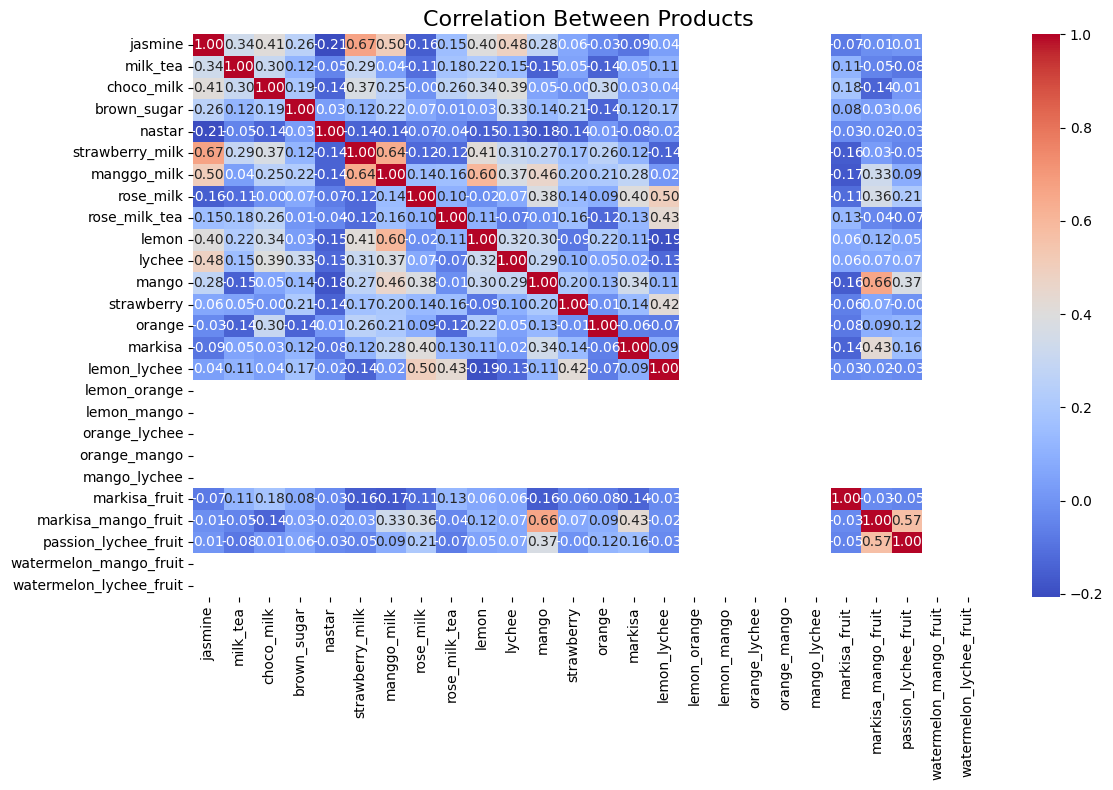

In [52]:
# Calculate correlation matrix
correlation_matrix = df[product_columns].corr()

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the correlation matrix
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Set the title of the plot
plt.title("Correlation Between Products", fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()